## Is it a cat?

Author: Alan Rivas
This code was created in the certification python course with the compay Crystal

## Import libraries

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Read data set

In [13]:
data=pd.read_csv("masotas_simulation.csv")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitud_bigotes_cms  1278 non-null   float64
 1   peso_gr               1278 non-null   float64
 2   longitud_piernas_cms  1278 non-null   float64
 3   tipo_orejas           1278 non-null   object 
 4   animal                1278 non-null   object 
dtypes: float64(3), object(2)
memory usage: 50.0+ KB


In [15]:
data=data.join(pd.get_dummies(data.tipo_orejas)).copy()

In [16]:
data.corr()

,longitud_bigotes_cms,peso_gr,longitud_piernas_cms,Ovaladas,Puntiagudas
longitud_bigotes_cms,1.000000,0.223673,-0.013095,-0.387929,0.387929
peso_gr,0.223673,1.000000,0.858445,0.427902,-0.427902
longitud_piernas_cms,-0.013095,0.858445,1.000000,0.516770,-0.516770
Ovaladas,-0.387929,0.427902,0.516770,1.000000,-1.000000
Puntiagudas,0.387929,-0.427902,-0.516770,-1.000000,1.000000


In [17]:
data.drop(["tipo_orejas","Ovaladas"],axis=1,inplace=True)
data.head()

,longitud_bigotes_cms,peso_gr,longitud_piernas_cms,animal,Puntiagudas
0,5.0,10000.0,32.0,Perro,1
1,9.0,3400.0,32.0,Perro,0
2,10.0,4000.0,15.0,Gato,1
3,6.0,3620.0,15.0,Gato,1
4,7.0,25000.0,15.0,Perro,0


In [18]:
X=data.drop(["animal"],axis=1).copy()
y=data.animal.apply(lambda x: 1 if x=="Perro" else 0)

In [19]:
data["animal_num"]=y

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Scaling


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train_tranformada=scaler.transform(X_train)
X_test_transormada=scaler.transform(X_test)

In [23]:
X_train_tranformada

array([[0.48888889, 0.06741703, 0.23763179, 1.        ],
       [0.4       , 0.09073593, 0.22141119, 1.        ],
       [0.26666667, 0.20509091, 0.46472019, 1.        ],
       ...,
       [0.46666667, 0.05887446, 0.18317692, 1.        ],
       [0.45714286, 0.05442177, 0.12756343, 1.        ],
       [0.45925926, 0.05202501, 0.17788592, 1.        ]])

# Logistic model

In [24]:
from sklearn.linear_model import LogisticRegression

model_logit=LogisticRegression()
model_logit.fit(X_train_tranformada,y_train)

LogisticRegression()

In [25]:
y_hat=model_logit.predict(X_test_transormada)

## Model evaluation

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[130,   0],
       [  2, 252]], dtype=int64)

In [27]:
model_logit_acc=accuracy_score(y_test,y_hat)
model_logit_acc

0.9947916666666666

In [28]:
model_logit_f1=f1_score(y_test,y_hat)
model_logit_f1

0.9960474308300395

In [29]:
model_logit_auc=roc_auc_score(y_test,y_hat)
model_logit_auc

0.9960629921259843

### Model interpretation

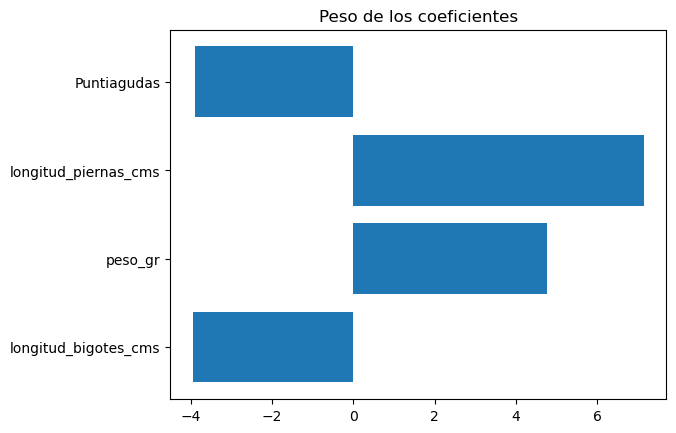

In [30]:
plt.barh(list(X.columns),list(model_logit.coef_[0]))
plt.title("Peso de los coeficientes")
plt.show()

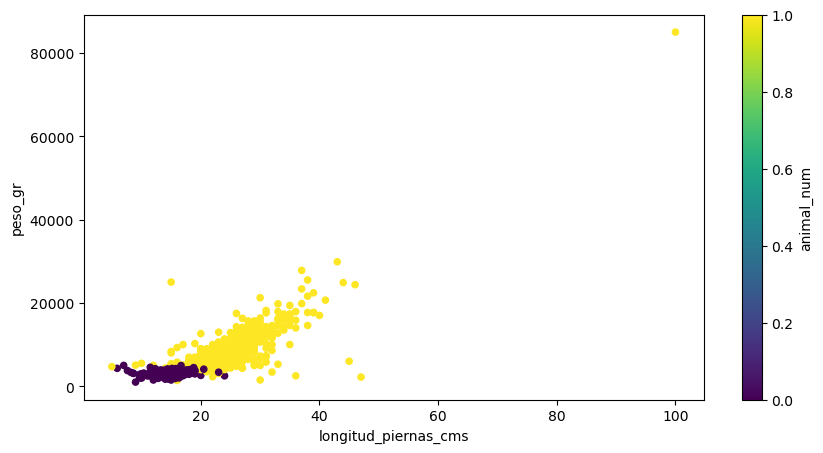

In [31]:
data.plot.scatter(x='longitud_piernas_cms',y='peso_gr',c='animal_num',colormap='viridis',figsize=(10,5))
plt.show()

# KNN model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_tranformada,y_train)

KNeighborsClassifier(n_neighbors=10)

In [33]:
y_hat=model_knn.predict(X_test_transormada)

C:\Users\jpvin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Model evaluation

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[129,   1],
       [  1, 253]], dtype=int64)

In [35]:
model_knn_acc=accuracy_score(y_test,y_hat)
model_knn_acc

0.9947916666666666

In [36]:
model_knn_f1=f1_score(y_test,y_hat)
model_knn_f1

0.9960629921259843

In [37]:
model_knn_auc=roc_auc_score(y_test,y_hat)
model_knn_auc

0.9941853422168383

# Classification tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_tree=DecisionTreeClassifier()
model_tree.fit(X_train_tranformada,y_train)

DecisionTreeClassifier()

In [28]:
y_hat=model_tree.predict(X_test_transormada)

## Model evaluation

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[126,   4],
       [  3, 251]], dtype=int64)

In [30]:
model_tree_acc=accuracy_score(y_test,y_hat)
model_tree_acc

0.9817708333333334

In [31]:
model_tree_f1=f1_score(y_test,y_hat)
model_tree_f1

0.9862475442043221

In [32]:
model_tree_auc=roc_auc_score(y_test,y_hat)
model_tree_auc

0.9787098728043611

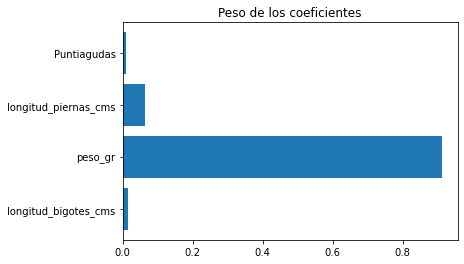

In [33]:
plt.barh(list(X.columns),list(model_tree.feature_importances_))
plt.title("Peso de los coeficientes")
plt.show()

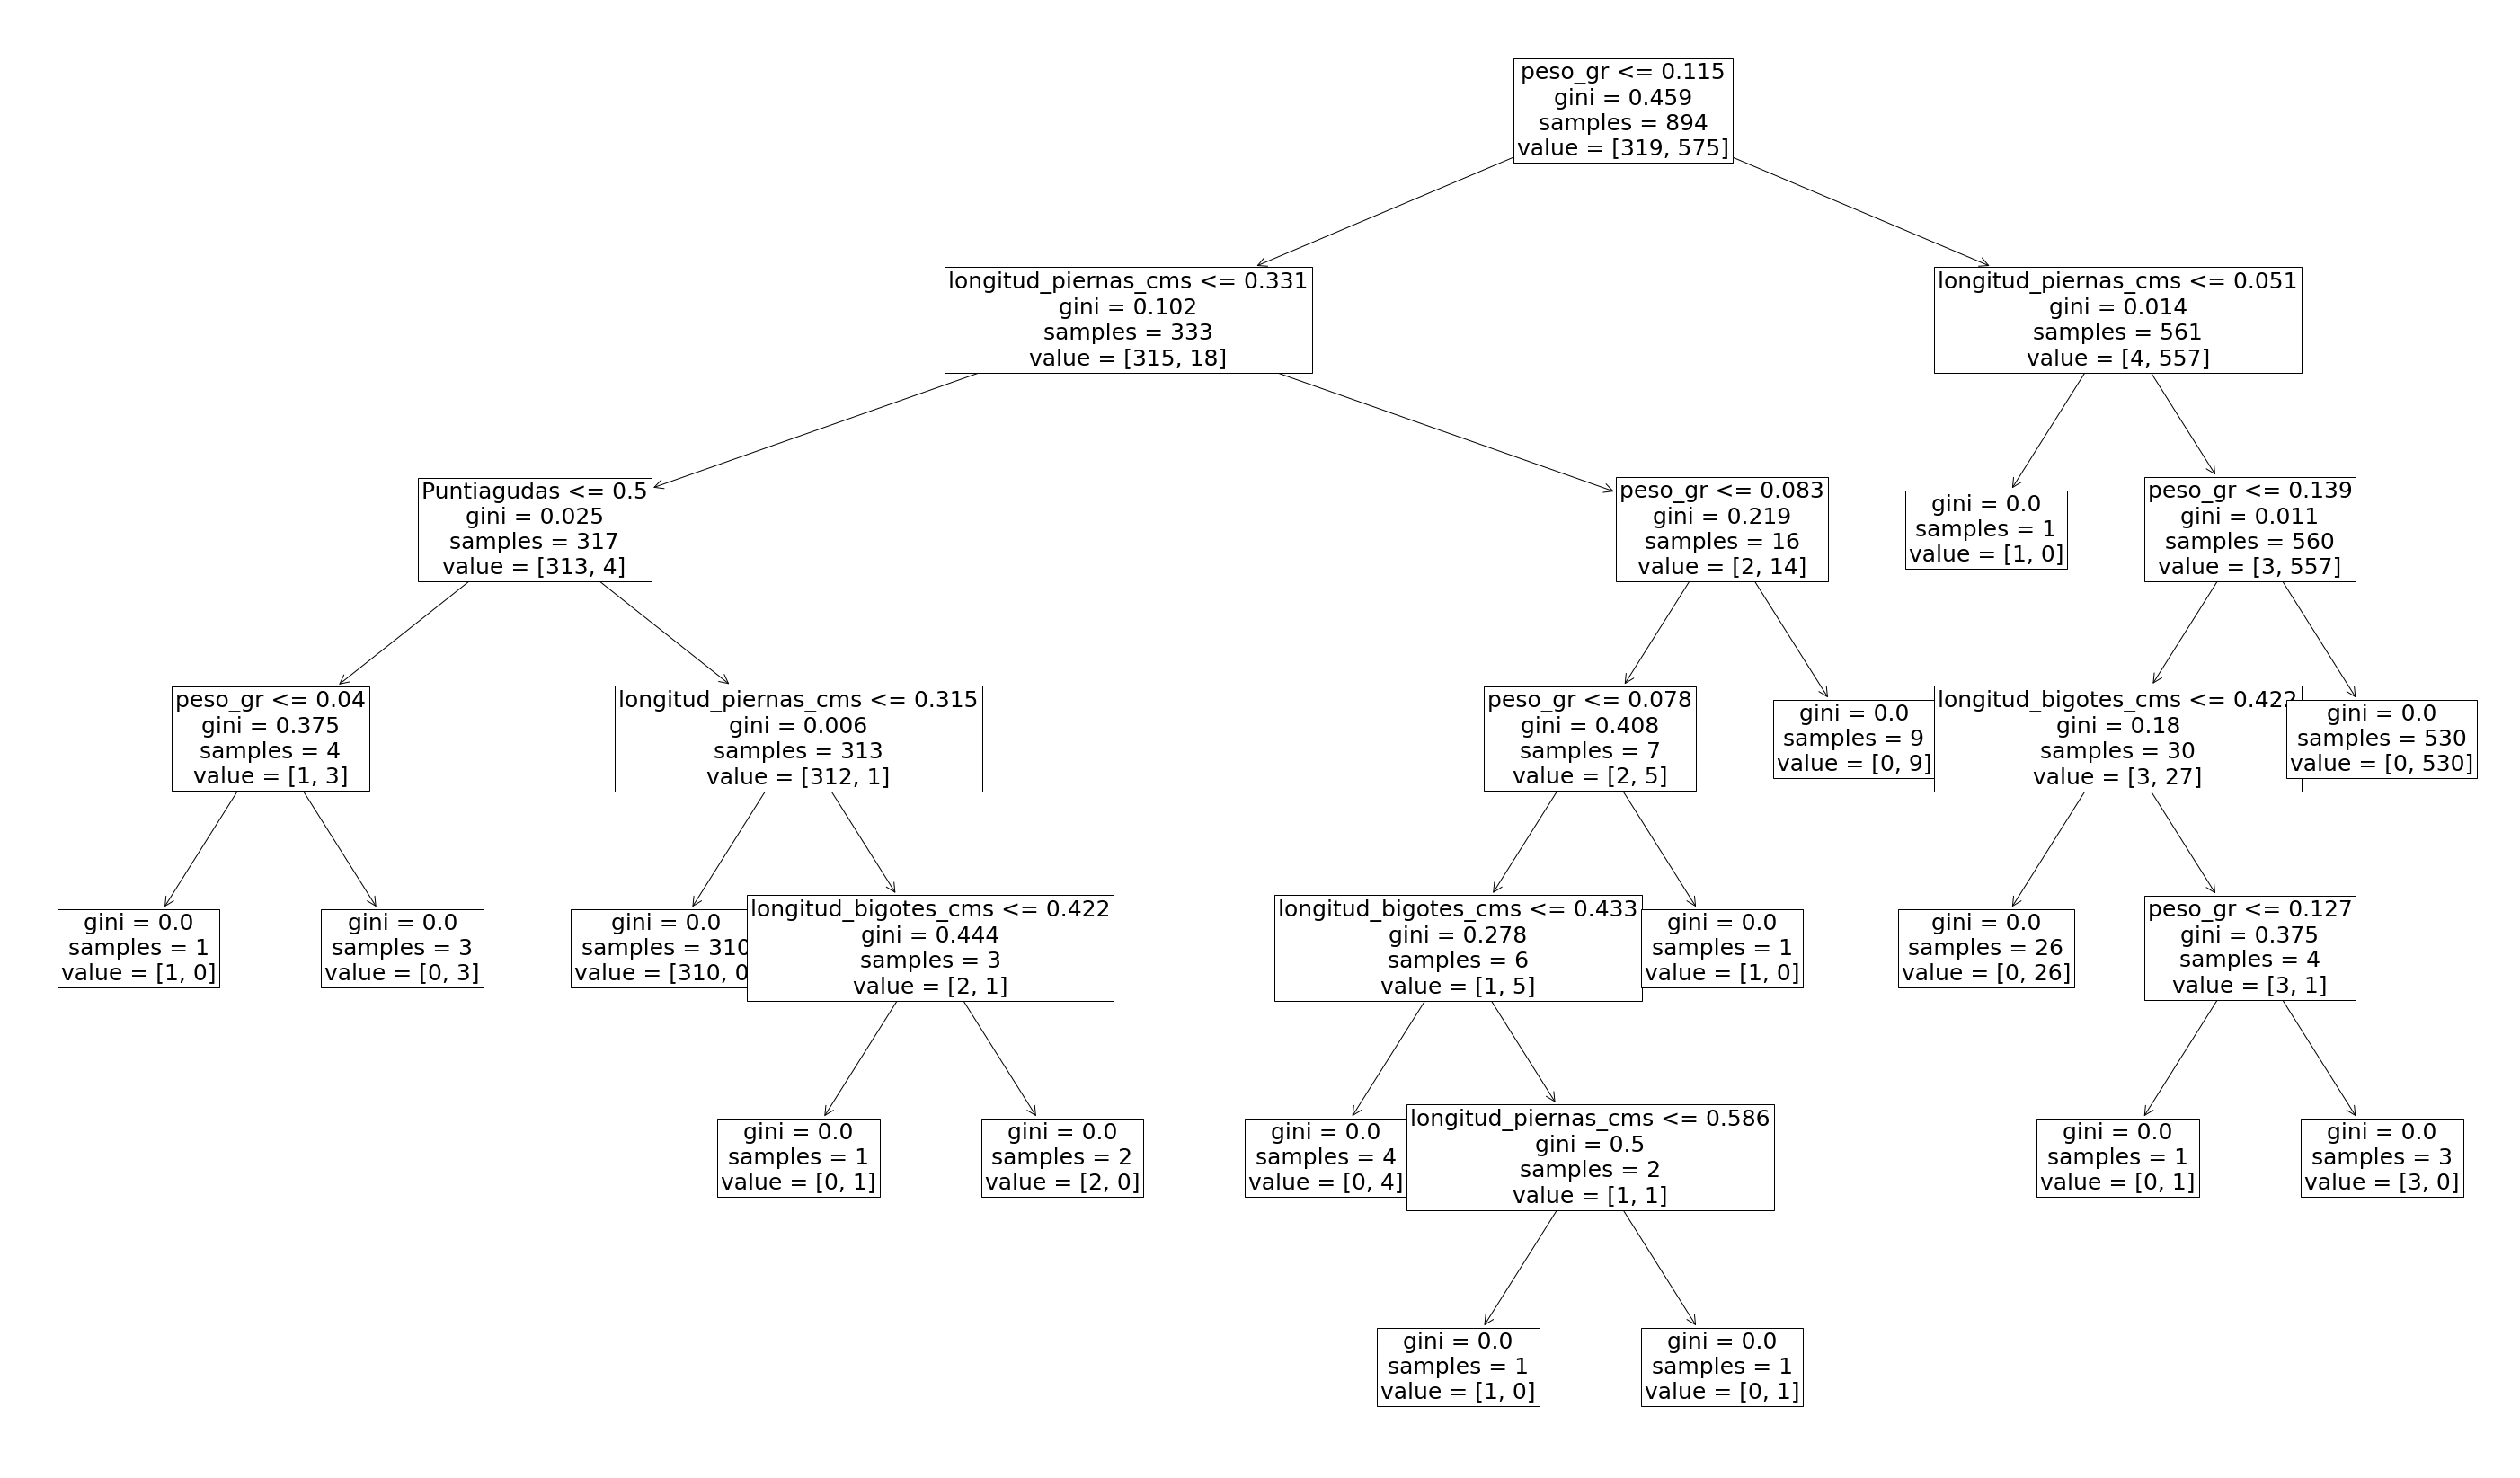

In [34]:
plt.figure(figsize=(50,30))
tree.plot_tree(model_tree,feature_names=X.columns,fontsize=25)
plt.show()

# Random forest classification model

In [35]:
from sklearn.ensemble import RandomForestClassifier

model_forest=RandomForestClassifier()
model_forest.fit(X_train_tranformada,y_train)

RandomForestClassifier()

In [36]:
y_hat=model_forest.predict(X_test_transormada)

## Model evaluation

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[129,   1],
       [  1, 253]], dtype=int64)

In [38]:
model_forest_acc=accuracy_score(y_test,y_hat)
model_forest_acc

0.9947916666666666

In [39]:
model_forest_f1=f1_score(y_test,y_hat)
model_forest_f1

0.9960629921259843

In [40]:
model_forest_auc=roc_auc_score(y_test,y_hat)
model_forest_auc

0.9941853422168383

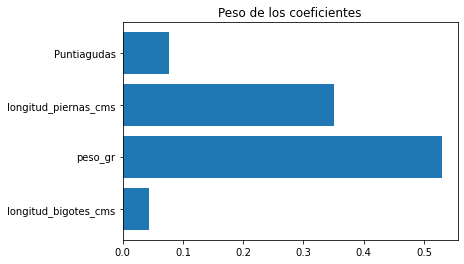

In [41]:
plt.barh(list(X.columns),list(model_forest.feature_importances_))
plt.title("Peso de los coeficientes")
plt.show()

# Model selection

In [42]:
metrics={"Accuracy":[model_logit_acc,model_knn_acc,model_tree_acc,model_forest_acc],
         "F1-Score":[model_logit_f1,model_knn_f1,model_tree_f1,model_forest_f1],
         "AUC":[model_logit_auc,model_knn_auc,model_tree_auc,model_forest_auc]
}

summary=pd.DataFrame(metrics,index=["Logistic","KNN","Tree","RFores"])

In [43]:
summary

,Accuracy,F1-Score,AUC
Logistic,0.994792,0.996047,0.996063
KNN,0.994792,0.996063,0.994185
Tree,0.981771,0.986248,0.978710
RFores,0.994792,0.996063,0.994185
